In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import mlflow
import mlflow.sklearn

mlflow.start_run()

# Convert the dataset to a DataFrame
fruits_df = pd.read_csv("fruits_dataset.csv")
fruits_df

,Color,Size,Label,Taste,Shape,Weight
0,Red,Small,Apple,Sweet,Round,Light
1,Red,Small,Apple,Sweet,Round,Light
2,Green,Medium,Banana,Sweet,Cylindrical,Medium
3,Green,Medium,Banana,Sweet,Cylindrical,Medium
4,Yellow,Large,Mango,Sweet,Oval,Heavy
5,Yellow,Large,Mango,Sweet,Oval,Heavy
6,Orange,Small,Orange,Sweet,Round,Light
7,Orange,Small,Orange,Sweet,Round,Light
8,Purple,Medium,Purple,Sweet,Round,Medium
9,Purple,Medium,Purple,Sweet,Round,Medium


In [7]:
color_mapping = {'Red': 0, 'Green': 1, 'Yellow': 2, 'Orange': 3, 'Purple': 4}
size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
shape_mapping = {'Round': 0, 'Cylindrical': 1, 'Oval': 2}
weight_mapping = {'Light': 0, 'Medium': 1, 'Heavy': 2}
label_mapping = {'Apple': 0, 'Banana': 1, 'Mango': 2, 'Orange': 3, 'Purple': 4}

# Log parameters
mlflow.log_param("color_mapping", color_mapping)
mlflow.log_param("size_mapping", size_mapping)
mlflow.log_param("shape_mapping", shape_mapping)
mlflow.log_param("weight_mapping", weight_mapping)
mlflow.log_param("label_mapping", label_mapping)

fruits_df['Color'] = fruits_df['Color'].map(color_mapping)
fruits_df['Size'] = fruits_df['Size'].map(size_mapping)
fruits_df['Shape'] = fruits_df['Shape'].map(shape_mapping)
fruits_df['Weight'] = fruits_df['Weight'].map(weight_mapping)
fruits_df['Label'] = fruits_df['Label'].map(label_mapping)
value = 0

# Check for missing values in the dataset
print(fruits_df.isnull().sum())

# Fill missing values with appropriate values (if any)
fruits_df.fillna(value, inplace=True)

# Split the dataset into features (X) and target (y)
X = fruits_df[['Color', 'Size', 'Shape', 'Weight']]
y = fruits_df['Label']

Color     0
Size      0
Label     0
Taste     0
Shape     0
Weight    0
dtype: int64


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# RandomForest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predictions
dt_predictions = dt_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate models
dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(classification_report(y_test, dt_predictions))

print("\nK-Nearest Neighbors Classifier:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(classification_report(y_test, knn_predictions))

print("\nRandom Forest Classifier:")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, rf_predictions))


# Decision Tree Classifier
mlflow.log_param("Decision Tree Max Depth", dt_classifier.get_params()['max_depth'])

# K-Nearest Neighbors Classifier
mlflow.log_param("KNN n_neighbors", knn_classifier.get_params()['n_neighbors'])

# RandomForest Classifier
mlflow.log_param("RandomForest n_estimators", rf_classifier.get_params()['n_estimators'])



# Log the dataset path
mlflow.log_param("dataset_path", "fruits_dataset.csv")

model_path = "decision_tree_model.pkl"
mlflow.sklearn.save_model(dt_classifier, model_path)

# Log the model file as an artifact
mlflow.log_artifact(model_path)

Decision Tree Classifier:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7


K-Nearest Neighbors Classifier:
Accuracy: 0.57
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       1.00      0.33      0.50         3

    accuracy                           0.57         7
   macro avg       0.60      0.47      0.50         7
weighted avg       0.86      0.57      0.6

/opt/homebrew/Cellar/jupyterlab/4.0.5/libexec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Cellar/jupyterlab/4.0.5/libexec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Cellar/jupyterlab/4.0.5/libexec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

MlflowException: Path 'decision_tree_model.pkl' already exists and is not empty

In [9]:
# End the run
mlflow.end_run()

/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


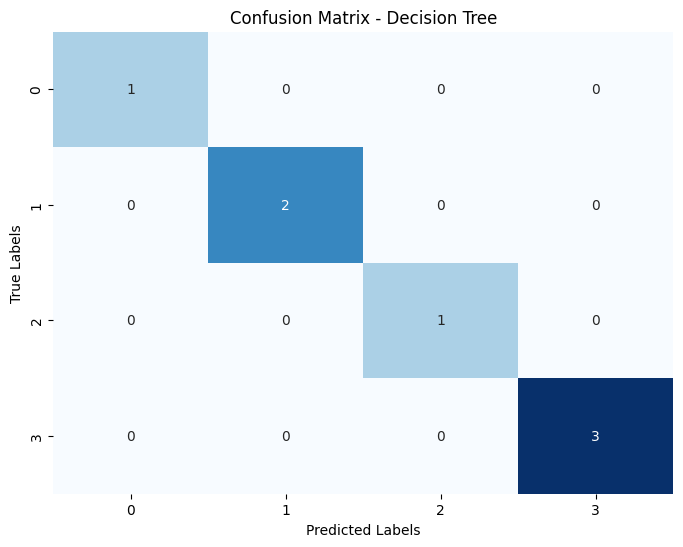

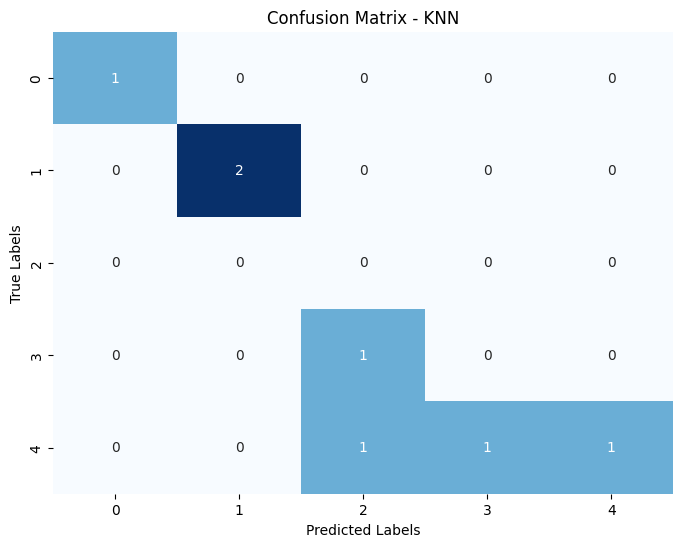

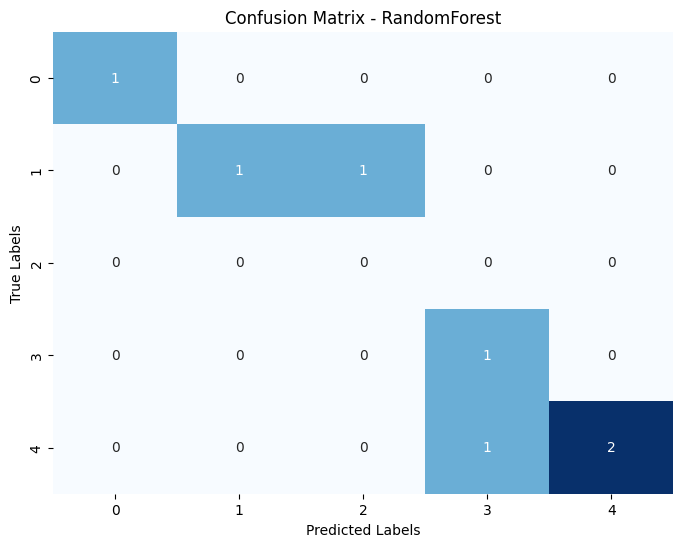

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
with mlflow.start_run():

    # Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    dt_predictions = dt_classifier.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)

    # Log metrics for Decision Tree
    mlflow.log_metric("accuracy_decision_tree", dt_accuracy)

    # K-Nearest Neighbors Classifier
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_train, y_train)
    knn_predictions = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)

    # Log metrics for K-Nearest Neighbors
    mlflow.log_metric("accuracy_knn", knn_accuracy)

    # RandomForest Classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    rf_predictions = rf_classifier.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    # Log metrics for RandomForest
    mlflow.log_metric("accuracy_random_forest", rf_accuracy)

    conf_matrix_dt = confusion_matrix(y_test, dt_predictions)
    conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
    conf_matrix_rf = confusion_matrix(y_test, rf_predictions)


    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix - Decision Tree")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    plt.savefig("confusion_matrix1.png")
    mlflow.log_artifact("confusion_matrix1.png", artifact_path="plots")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix - KNN")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    plt.savefig("confusion_matrix2.png")
    mlflow.log_artifact("confusion_matrix2.png", artifact_path="plots")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix - RandomForest")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    plt.savefig("confusion_matrix3.png")
    mlflow.log_artifact("confusion_matrix3.png", artifact_path="plots")

    

    # Log model artifacts
    mlflow.sklearn.log_model(dt_classifier, "decision_tree_model")
    mlflow.sklearn.log_model(knn_classifier, "knn_model")
    mlflow.sklearn.log_model(rf_classifier, "random_forest_model")